# Python 快速入门

本教程由 Stanford CS231n 课程笔记 [Python Numpy Tutorial](https://cs231n.github.io/python-numpy-tutorial/) 演绎而来，原作者为 [Justin Johnson](http://cs.stanford.edu/people/jcjohns/)，译者为[杜客](https://zhuanlan.zhihu.com/p/20878530), 由助教在原有内容的基础上增改了部分内容。

我们将在本课程中将 Python 编程语言用于所有作业。Python 本身就是一种很棒的通用编程语言，在一些流行的库如 Numpy, Scipy 和 Matplotlib 的帮助下，它能够提供强大的科学计算环境。同时我们希望一部分的学生具备一些 Python 和 Numpy 的相关经验；对于零基础的同学，这一小节会作为 Python 编程语言和 Python 科学计算环境的速成课程。

## Python 简介

Python 是一种高级，动态类型的多范式编程语言。通常 Python 代码几乎被认为和伪代码一样，因为它允许你在非常少的代码行中实现非常强大的想法，同时具有很强的可读性。作为示例，下面是 Python 中经典快速排序算法的实现：

In [4]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))
# 输出 "[1, 1, 2, 3, 6, 8, 10]"

[1, 1, 2, 3, 6, 8, 10]


## Python 版本
Python 2.7 版本将于 2020 年不再提供官方维护，在本门课程中建议使用 3.5 以上的版本。由于Python 3.0 引入了许多向后兼容的语言变化，因此使用 2.7 版本编写的代码可能无法在 3.5 以上的版本下运行，反之亦然。现在通过 `__future__` 模块，可以在诸如 2.7 的较早期的 Python 版本下使用新版 Python 的特性。

你可以使用下面的代码检查当前的 Python 版本(高于 3.5 即可)：

In [3]:
!python --version

Python 3.7.1


## 基础数据类型

与大多数编程语言一样，Python 有许多基本类型，包括整数，浮点数，布尔值和字符串。这些数据类型的工作方式与其他编程语言相似。

**数字：**整数和浮点数的使用方式与其他语言类似：

In [6]:
x = 3
print(type(x)) # 输出 "<class 'int'>"
print(x)       # 输出 "3"
print(x + 1)   # 加法; 输出 "4"
print(x - 1)   # 减法; 输出 "2"
print(x * 2)   # 乘法; 输出 "6"
print(x ** 2)  # 幂运算; 输出 "9"

x += 1
print(x)  # 输出 "4"

x *= 2
print(x)  # 输出 "8"

y = 2.5
print(type(y)) # 输出 "<class 'float'>"
print(y, y + 1, y * 2, y ** 2) # 输出 "2.5 3.5 5.0 6.25"

<class 'int'>
3
4
2
6
9
4
8
<class 'float'>
2.5 3.5 5.0 6.25


需要注意的是，与其它语言不同，Python 不支持自增 `x++` 和自减运算 `x--`.
Python 也有内置的复数类型，具体细节可以查看[文档](https://docs.python.org/3.7/library/stdtypes.html#numeric-types-int-float-complex).

**布尔型：**Python 实现了所有的布尔逻辑，但用的是英语，而不是我们习惯的操作符(比如 `&&`和 `||` 等).

In [3]:
t = True
f = False
print(type(t)) # 输出 "<class 'bool'>"
print(t and f) # 逻辑与 AND; 输出 "False"
print(t or f)  # 逻辑或 OR; 输出 "True"
print(not t)   # 逻辑非 NOT; 输出 "False"
print(t != f)  # 逻辑异或 XOR; 输出 "True"  

<class 'bool'>
False
True
False
True


**字符串：**Python 对字符串的支持非常棒。

In [4]:
hello = 'hello'   # 字符串可以使用单引号
world = "world"   # 或者双引号; 区别不大
print(hello)       # 输出 "hello"
print(len(hello))  # 字符串长度; 输出 "5"
hw = hello + ' ' + world  # 字符串连接
print(hw)  # 输出 "hello world"
hw12 = '%s %s %d' % (hello, world, 12)  # sprintf 风格的字符串格式化
print(hw12)  # 输出 "hello world 12"

hello
5
hello world
hello world 12


字符串对象有一系列有用的方法，比如：

In [6]:
s = "hello"
print(s.capitalize())  # 将字符串首字母大写; 输出 "Hello"
print(s.upper())       # 将字符串转换为大写; 输出 "HELLO"
print(s.rjust(7))      # 右对齐字符串，填充空格; 输出 "  hello"
print(s.center(7))     # 将字符串居中，多余位置用空格填充; 输出 " hello "
print(s.replace('l', '(ell)'))  # 用一个子串代替另一个子串;
                                # 输出 "he(ell)(ell)o"
print('  world '.strip())  # 去掉前面和后面的空格; 输出 "world"

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


如果想详细查看字符串方法，请看[文档](https://docs.python.org/3.7/library/stdtypes.html#string-methods)。

## 容器(Containers)

Python 有以下几种容器类型：列表(lists)、字典(dictionaries)、集合(sets)和元组(tuples).

### 列表(Lists)

列表就是 Python 中的数组，但是列表长度可变，且能包含不同类型元素。

In [1]:
xs = [3, 1, 2]    # 创建列表
print(xs, xs[2])  # 输出 "[3, 1, 2] 2"，从 0 开始索引
print(xs[-1])     # 负索引表示从列表末尾开始; 输出 "2"
xs[2] = 'foo'     # 列表可以包含不同类型的元素
print(xs)         # 输出 "[3, 1, 'foo']"
xs.append('bar')  # 在列表末尾添加一个新元素
print(xs)         # 输出 "[3, 1, 'foo', 'bar']"
x = xs.pop()      # 删除并返回列表的最后一个元素
print(x, xs)      # 输出 "bar [3, 1, 'foo']"

[3, 1, 2] 2
2
[3, 1, 'foo']
[3, 1, 'foo', 'bar']
bar [3, 1, 'foo']


列表的细节，同样可以查阅[文档](https://docs.python.org/3.7/tutorial/datastructures.html#more-on-lists)。

**切片(Slicing)**: 为了一次性地获取列表中的元素，Python 提供了一种简洁的语法，这就是切片。下面使用了 `range` 内置函数，注意区别，Python2 中的 `range` 返回的是一个列表，Python3 中的 `range` 返回的是一个迭代值，需要用 `list` 形成列表。

In [4]:
nums = list(range(5))  
print(nums)         # 输出 "[0, 1, 2, 3, 4]"
print(nums[2:4])    # 获得索引 [2,4) 切片; 输出 "[2, 3]"
print(nums[2:])     # 获得索引 [2,末尾] 切片; 输出 "[2, 3, 4]"
print(nums[:2])     # 获得索引 [起始,2) 切片; 输出 "[0, 1]"
print(nums[:])      # 获得整个列表的切片; 输出 ["0, 1, 2, 3, 4]"
print(nums[:-1])    # 切片中的参数也可是负数; 输出 ["0, 1, 2, 3]"
nums[2:4] = [8, 9]  # 为切片分配新的子列表
print(nums)         # 输出 "[0, 1, 8, 9, 4]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


在 Numpy 数组的内容中，我们会再次看到切片语法。

**循环(Loops)**: 我们可以这样遍历列表中的每一个元素：

In [6]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)
# 输出 "cat", "dog", "monkey", 每个占一行

cat
dog
monkey


如果想要在循环体内访问每个元素的指针，可以使用内置的 `enumerate` 函数：

In [7]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))
# 输出 "#1: cat", "#2: dog", "#3: monkey", 每个占一行

#1: cat
#2: dog
#3: monkey


列表推导(List comprehensions): 在编程的时候，我们常常想要将一种数据类型转换为另一种。下面是一个简单例子，将列表中的每个元素变成它的平方。

In [8]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)   # 输出 [0, 1, 4, 9, 16]

[0, 1, 4, 9, 16]


使用列表推导，你就可以让代码简化很多：

In [9]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)   # 输出 [0, 1, 4, 9, 16]

[0, 1, 4, 9, 16]


列表推导还可以包含条件：

In [10]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)  # 输出 "[0, 4, 16]"

[0, 4, 16]


### 字典(Dictionaries)

字典用来储存 `(key, value)` 对，这和 Java 中的 Map 差不多。你可以这样使用它：

In [20]:
d = {'cat': 'cute', 'dog': 'furry'}  # 用一些数据创建一个新字典
print(d['cat'])       # 从字典中获取条目; 输出 "cute"
print('cat' in d)     # 检查字典是否有给定的键; 输出 "True"
d['fish'] = 'wet'     # 在字典中设置条目
print(d['fish'])      # 输出 "wet"
# print(d['monkey'])  # KeyError: 'monkey' not a key of d
print(d.get('monkey', 'N/A'))  # 获取具有默认值的元素; 输出 "N/A"
print(d.get('fish', 'N/A'))    # 获取具有默认值的元素; 输出 "wet"
del d['fish']         # 从字典中删除一个元素
print(d.get('fish', 'N/A'))    # "fish" 不再是一个键; 输出 "N/A"

cute
True
wet
N/A
wet
N/A


想要知道字典的其他特性，请查阅[文档](https://docs.python.org/2/library/stdtypes.html#dict)。

**循环(Loops):** 在字典中，用键来迭代更加容易。

In [22]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal in d:
    legs = d[animal]
    print('A %s has %d legs' % (animal, legs))
# 输出 "A person has 2 legs", "A spider has 8 legs", "A cat has 4 legs"

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


如果你想要访问键和对应的值，那就使用 `items` 方法：

In [ ]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print('A %s has %d legs' % (animal, legs))
# 输出 "A person has 2 legs", "A spider has 8 legs", "A cat has 4 legs"

**字典推导(Dictionary comprehensions)**: 和列表推导类似，但是允许你方便地构建字典。

In [27]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)  # 输出 "{0: 0, 2: 4, 4: 16}"

{0: 0, 2: 4, 4: 16}


### 集合(Sets)

集合是独立不同个体的无序集合。示例如下：

In [28]:
animals = {'cat', 'dog'}
print('cat' in animals)   # 检查一个元素是否在一个集合中; 输出 "True"
print('fish' in animals)  # 输出 "False"
animals.add('fish')       # 向集合中添加一个元素
print('fish' in animals)  # 输出 "True"
print(len(animals))       # 集合中元素的个数; 输出 "3"
animals.add('cat')        # 添加集合中已经存在的元素没有任何作用
print(len(animals))       # 输出 "3"
animals.remove('cat')     # 从集合中移除一个元素
print(len(animals))       # 输出 "2"

True
False
True
3
3
2


和前面一样，要知道更详细的，查看[文档](https://docs.python.org/3.7/library/sets.html#set-objects)。

**循环(Loops):** 在集合中循环的语法和在列表中一样，但是集合是无序的，所以你在访问集合的元素的时候，不能做关于顺序的假设。

In [35]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))
# 不能假设输出 "#1: cat", "#2: dog", "#3: fish"

#1: cat
#2: fish
#3: dog


**集合推导(Set comprehensions)**: 和字典推导一样，可以很方便地构建集合：

In [43]:
from math import sqrt
nums = {int(sqrt(x)) for x in range(30)}
print(nums)  # 输出 "([0, 1, 2, 3, 4, 5])"

{0, 1, 2, 3, 4, 5}


### 元组(Tuples)

元组是一个值的有序列表（不可改变）。从很多方面来说，元组和列表都很相似。和列表最重要的不同在于，元组可以在字典中用作键，还可以作为集合的元素，而列表不行。例子如下：

In [1]:
d = {(x, x + 1): x for x in range(10)}  # 使用元组作为键创建字典
print(d)
t = (5, 6)        # 创建一个元组
print(type(t))    # 输出 "<class 'tuple'>"
print(d[t])       # 输出 "5"
print(d[(1, 2)])  # 输出 "1"

{(0, 1): 0, (1, 2): 1, (2, 3): 2, (3, 4): 3, (4, 5): 4, (5, 6): 5, (6, 7): 6, (7, 8): 7, (8, 9): 8, (9, 10): 9}
<class 'tuple'>
5
1


[文档](https://docs.python.org/3.7/tutorial/datastructures.html#tuples-and-sequences)有更多元组的信息。

## 函数(Functions)

Python 函数使用 `def` 来定义函数：

In [3]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))
# 输出 "negative", "zero", "positive"

negative
zero
positive


我们常常使用可选参数来定义函数：

In [4]:
def hello(name, loud=False):
    if loud:
        print('HELLO, %s' % name.upper())
    else:
        print('Hello, %s!' % name)

hello('Bob') # 输出 "Hello, Bob"
hello('Fred', loud=True)  # 输出 "HELLO, FRED!"

Hello, Bob!
HELLO, FRED


## 类(Classes)

Python 对于类的定义是简单直接的：

In [5]:
class Greeter(object):

    # 构造函数
    def __init__(self, name):
        self.name = name  # 创建实例变量

    # 实例方法
    def greet(self, loud=False):
        if loud:
            print('HELLO, %s!' % self.name.upper())
        else:
            print('Hello, %s' % self.name)

g = Greeter('Fred')  # 构造 Greeter 类的实例
g.greet()            # 调用实例方法; 输出 "Hello, Fred"
g.greet(loud=True)   # 调用实例方法; 输出 "HELLO, FRED!"

Hello, Fred
HELLO, FRED!


更多类的信息请查阅[文档](https://docs.python.org/3.7/tutorial/classes.html)。

# Numpy 快速入门

Numpy 是 Python 中用于科学计算的核心库。它提供了高性能的多维数组对象，以及相关工具。

In [7]:
import numpy as np

## 数组(Arrays)

一个 Numpy 数组是一个由不同数值组成的网格。网格中的数据都是同一种数据类型，可以通过非负整型数的元组来访问。维度的数量被称为数组的阶，数组的大小是一个由整型数构成的元组，可以描述数组不同维度上的大小。

我们可以从列表创建数组，然后利用方括号访问其中的元素：

In [8]:
a = np.array([1, 2, 3])   # 创建秩为 1 的数组，即向量
print(type(a))            # 输出 "<class 'numpy.ndarray'>"
print(a.shape)            # 输出 "(3,)"
print(a[0], a[1], a[2])   # 输出 "1 2 3"
a[0] = 5                  # 改变数组中的元素
print(a)                  # 输出 "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])    # 创建秩为 2 的数组，即矩阵
print(b)                           # 输出矩阵 b
print(b.shape)                     # 输出 "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # 输出 "1 2 4"

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
[[1 2 3]
 [4 5 6]]
(2, 3)
1 2 4


Numpy 还提供了很多其他创建数组的方法：

In [10]:
a = np.zeros((2,2))  # 创建元素全为 0 的数组
print(a)             # 输出 "[[ 0.  0.]
                     #          [ 0.  0.]]"

b = np.ones((1,2))   # 创建元素全为 1 的数组
print(b)             # 输出 "[[ 1.  1.]]"

c = np.full((2,2), 7) # 创建一个常量数组
print(c)              # 输出 "[[ 7.  7.]
                      #          [ 7.  7.]]"

d = np.eye(2)        # 创建一个 2x2 单位矩阵
print(d)             # 输出 "[[ 1.  0.]
                     #          [ 0.  1.]]"

e = np.random.random((2,2)) # 创建一个包含随机值的数组
print(e)                    # 可能输出 "[[ 0.91940167  0.08143941]
                            #               [ 0.68744134  0.87236687]]"

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.4586663  0.2836343 ]
 [0.03578567 0.59191107]]


其他数组相关方法，请查看[文档](http://docs.scipy.org/doc/numpy/user/basics.creation.html#arrays-creation)。

### 访问数组
Numpy 提供了多种访问数组的方法。

**切片：**和 Python 列表类似，Numpy 数组可以使用切片语法。因为数组可以是多维的，所以你必须为每个维度指定好切片。

In [12]:
# 创建形状为 (3, 4) 的秩为 2 的数组，如下所示
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# 使用切片来提取由前两行和索引为 1,2 列组成的子数组
# b 是形状为 (2, 2) 的数组，如下所示
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]

# 数组的一个切片是指向相同数据的视图，因此如果修改它
# 也将修改原始数组
print(a[0, 1])   # 输出 "2"
b[0, 0] = 77    # b[0, 0] 和 a[0, 1] 位置的数据一致
print(a[0, 1])   # 输出 "77"

2
77


你可以同时使用整型和切片语法来访问数组。但是，这样做会产生一个比原数组低阶的新数组。需要注意的是，这里和 MATLAB 中的情况是不同的：

In [13]:
# 创建形状为 (3, 4) 的秩为 2 的数组，如下所示
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# 访问数组中行数据的两种方法。
# 将整数索引和切片混合在一起会得到一个级别较低的数组，
# 当只使用切片时，将生成与原始数组相同秩的数组:
row_r1 = a[1, :]    # 秩为 1 的 a 的第二行的视图  
row_r2 = a[1:2, :]  # 秩为 2 的 a 的第二行的视图  
print(row_r1, row_r1.shape)  # 输出 "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # 输出 "[[5 6 7 8]] (1, 4)"

# 我们可以在访问数组的列时做同样的区分:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # 输出 "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # 输出 "[[ 2]
                            #          [ 6]
                            #          [10]] (3, 1)"

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


**整型数组访问：**当我们使用切片语法访问数组时，得到的总是原数组的一个子集。整型数组访问允许我们利用其它数组的数据构建一个新的数组：

In [14]:
a = np.array([[1,2], [3, 4], [5, 6]])

# 整型数组索引的一个例子。
# 返回的数组将具有 (3,) 并输出 "[1 4 5]"
print(a[[0, 1, 2], [0, 1, 0]])

# 上面的整型数组索引示例与此等价:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # 输出 "[1 4 5]"

# 使用整型数组索引时，可以重用原数组中的相同元素:
print(a[[0, 0], [1, 1]])  # Prints "[2 2]"

# 等价于前面的整数数组索引示例
print(np.array([a[0, 1], a[0, 1]]))  # Prints "[2 2]"

[1 4 5]
[1 4 5]
[2 2]
[2 2]


整型数组访问语法还有个有用的技巧，可以用来选择或者更改矩阵中每行中的一个元素：

In [15]:
# 创建一个新数组，从中选择元素
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a) # 输出   "array([[ 1,  2,  3],
         #                [ 4,  5,  6],
         #                [ 7,  8,  9],
         #                [10, 11, 12]])"

# 创建索引数组
b = np.array([0, 2, 0, 1])

# 使用 b 中的索引从 a 的每一行中选择一个元素
print(a[np.arange(4), b])  # 输出 "[ 1  6  7 11]"

# 使用 b 中的索引从 a 的每一行中修改一个元素
a[np.arange(4), b] += 10

print(a) # 输出    "array([[11,  2,  3],
         #                [ 4,  5, 16],
         #                [17,  8,  9],
         #                [10, 21, 12]])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]
[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


**布尔型数组访问：**布尔型数组访问可以让你选择数组中任意元素。通常，这种访问方式用于选取数组中满足某些条件的元素，举例如下：

In [17]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # 找出 a 中大于 2 的元素;
                    # 这将返回布尔值表示的 Numpy 数组
                    # 形状和 a 相同, bool_idx 每个槽表示对应 a 的元素是否 > 2

print(bool_idx)     # 输出   "[[False False]
                    #          [ True  True]
                    #          [ True  True]]"

# 我们使用布尔数组索引来构造一个秩为 1 的数组
# 由对应于 bool_idx 的真值的 a 的元素组成
print(a[bool_idx])  # 输出   "[3 4 5 6]"

# 我们可以用一个简洁的声明做到同样的效果:
print(a[a > 2])     # 输出   "[3 4 5 6]"

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


为了教程简洁，有很多数组访问的细节我们没有详细说明，可以查看[文档](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html)。

### 数据类型
每个 Numpy 数组都是数据类型相同的元素组成的网格。Numpy 提供了很多的数据类型用于创建数组。当你创建数组的时候，Numpy 会尝试猜测数组的数据类型，你也可以通过参数直接指定数据类型，例子如下：

In [19]:
x = np.array([1, 2])  # 让 Numpy 选择数据类型
print(x.dtype)        # 输出 "int64"

x = np.array([1.0, 2.0])   # 让 Numpy 选择数据类型
print(x.dtype)             # 输出 "float64"

x = np.array([1, 2], dtype=np.int64)   # 强制使用特定的数据类型
print(x.dtype)                         # 输出 "int64"

int32
float64
int64


更多细节查看[文档](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html)。

### 数组计算

基本数学计算函数会对数组中元素逐个进行计算，既可以利用操作符重载，也可以使用函数方式：

In [20]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# 元素间求和；均会产生数组
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# 元素间求差；均会产生数组
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# 元素间乘法；均会产生数组
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# 元素间除法；均会产生数组
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# 元素开根 ；产生数组
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


和 MATLAB 不同，`*` 是元素逐个相乘，而不是矩阵乘法。在 Numpy 中使用 `dot` 来进行矩阵乘法：

In [23]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# 向量内积; 均会产生 219
print(v.dot(w))
print(np.dot(v, w))

# 矩阵 / 向量乘积; 均会产生秩为 1 的数组 [29 67]
print(x.dot(v))
print(np.dot(x, v))

# 矩阵 / 向量乘积; 均会产生秩为 2 的数组
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

219
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy 提供了很多计算数组的函数，其中最常用的一个是 `sum`：

In [27]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # 计算所有元素的和; 输出 "10"
print(np.sum(x, axis=0))  # 计算每一列的和; 输出 "[4 6]"
print(np.sum(x, axis=1))  # 计算每一行的和; 输出 "[3 7]"

10
[4 6]
[3 7]


想要了解更多函数，可以查看[文档](http://docs.scipy.org/doc/numpy/reference/routines.math.html)。

除了计算，我们还常常改变数组或者操作其中的元素。其中将矩阵转置是常用的一个，在 Numpy 中，使用 `T` 来转置矩阵：

In [28]:
x = np.array([[1,2], [3,4]])
print(x)    # 输出  "[[1 2]
            #          [3 4]]"
print(x.T)  # 输出  "[[1 3]
            #          [2 4]]"

# 注意，对一个秩为 1 的数组进行转置没有任何作用:
v = np.array([1,2,3])
print(v)    # 输出   "[1 2 3]"
print(v.T)  # 输出   "[1 2 3]"

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[1 2 3]
[1 2 3]


Numpy 还提供了更多操作数组的方法，请查看[文档](http://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html)。

## 广播(Broadcasting)

广播是一种强有力的机制，它让 Numpy 可以让不同大小的矩阵在一起进行数学计算。我们常常会有一个小的矩阵和一个大的矩阵，然后我们会需要用小的矩阵对大的矩阵做一些计算。

举个例子，如果我们想要把一个向量加到矩阵的每一行，我们可以这样做：

In [30]:
# 我们将向量 v 加到矩阵 x 的每一行
# 将结果存储在矩阵 y 中
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # 创建一个形状与 x 相同的空矩阵

# 用显式循环将向量 v 添加到矩阵 x 的每一行
for i in range(4):
    y[i, :] = x[i, :] + v

# 现在矩阵 y 如下所示
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


这样是行得通的，但是当 x 矩阵非常大，利用循环来计算就会变得很慢很慢。我们可以换一种思路：

In [31]:
# 我们将向量 v 加到矩阵 x 的每一行
# 将结果存储在矩阵 y 中
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))  # 将 4 行 v 向量叠在一起
print(vv)                # 输出   "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"
y = x + vv  # x 和 vv 元素间相加
print(y)  # 输出 "[[ 2  2  4
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy 广播机制可以让我们不用创建 vv，就能直接运算，看看下面例子：

In [32]:
# 我们将向量 v 加到矩阵 x 的每一行
# 将结果存储在矩阵 y 中
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # 使用广播将 v 添加到 x 的每一行
print(y) # 输出 "[[ 2  2  4]
         #          [ 5  5  7]
         #          [ 8  8 10]
         #          [11 11 13]]"

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


对两个数组使用广播机制要遵守下列规则：

1. 如果数组的秩不同，使用1来将秩较小的数组进行扩展，直到两个数组的尺寸的长度都一样。
2. 如果两个数组在某个维度上的长度是一样的，或者其中一个数组在该维度上长度为1，那么我们就说这两个数组在该维度上是相容的。
3. 如果两个数组在所有维度上都是相容的，他们就能使用广播。
4. 如果两个输入数组的尺寸不同，那么注意其中较大的那个尺寸。因为广播之后，两个数组的尺寸将和那个较大的尺寸一样。
5. 在任何一个维度上，如果一个数组的长度为1，另一个数组长度大于1，那么在该维度上，就好像是对第一个数组进行了复制。

如果上述解释看不明白，可以读一读[文档](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)和这个[解释](http://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc)。译者注：强烈推荐阅读文档中的例子。

支持广播机制的函数是全局函数。哪些是全局函数可以在[文档](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs)中查找。

下面是一些广播机制的使用：

In [33]:
# 计算向量的外积
v = np.array([1,2,3])  # v 形状为 (3,)
w = np.array([4,5])    # w 形状为 (2,)
# 为了计算一个外积，我们首先将 v 改变为形状为 (3, 1) 的列
# 然后我们可以对 w 进行广播，得到形状 (3,2) 的外积输出:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print(np.reshape(v, (3, 1)) * w)

# 给矩阵的每一行加上一个向量
x = np.array([[1,2,3], [4,5,6]])
# x 形状为 (2, 3), v 形状为 (3,) 将被广播为 (2, 3)
# 得到下面的矩阵
# [[2 4 6]
#  [5 7 9]]
print(x + v)

# 给矩阵的每一列加上一个向量
# x 形状为 (2, 3), w 形状为 (2,).
# 如果将 x 转置得到形状 (3, 2) 并让 w 广播为 (3, 2) 形状

# 将结果再次转置得到形状 (2, 3) 也就是矩阵  x加上每一列向量 w
# 得到如下矩阵:
# [[ 5  6  7]
#  [ 9 10 11]]
print((x.T + w).T)

# 另一种解决方案是将 w 重塑为形状 (2,1)的行向量
# 然后我们可以直接对 x 进行广播，以产生相同的输出
print(x + np.reshape(w, (2, 1)))

# 将一个矩阵乘以一个常数:
# x 形状为 (2, 3). Numpy将标量视为形状为 () 的数组
# 这些可以一起广播以形成 (2, 3)
# 结果如下所示:
# [[ 2  4  6]
#  [ 8 10 12]]
print(x * 2)

[[ 4  5]
 [ 8 10]
 [12 15]]
[[2 4 6]
 [5 7 9]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 2  4  6]
 [ 8 10 12]]


广播机制能够让你的代码更简洁更迅速，能够用的时候请尽量使用！

## Numpy 和 SciPy 文档

这篇教程涉及了你需要了解的 Numpy 中的一些重要内容，但是 Numpy远不止如此。可以查阅 Numpy [文献](http://docs.scipy.org/doc/numpy/reference/)来学习更多。

Numpy 提供了高性能的多维数组，以及计算和操作数组的基本工具。[SciPy](http://docs.scipy.org/doc/scipy/reference/) 基于 Numpy，提供了大量的计算和操作数组的函数，这些函数对于不同类型的科学和工程计算非常有用。

熟悉 SciPy 的最好方法就是阅读[文档](http://docs.scipy.org/doc/scipy/reference/index.html)。我们会强调对于本课程有用的部分。

# Matplotlib 快速入门

Matplotlib 是一个作图库。这里简要介绍 `matplotlib.pyplot` 模块，功能和 MATLAB 的作图功能类似。

In [36]:
import matplotlib.pyplot as plt

# 在 notebook 中使用这条指令，则无需 plt.show()
%matplotlib inline 


## 绘图

`matplotlib` 库中最重要的函数是 `Plot`.该函数允许你做出 2D 图形，如下：

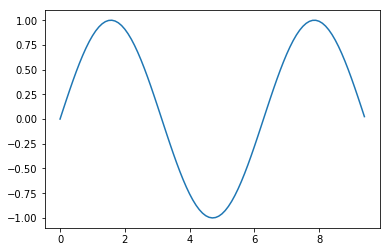

In [38]:

# 计算正弦曲线上点的 x 和 y 坐标
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# 使用 matplotlib 绘制这些点
plt.plot(x, y)
plt.show()  # 如果没有上面的指令，必须调用 plt.show()才能显示图形

只需要少量工作，就可以一次画不同的线，加上标签，坐标轴标志等。

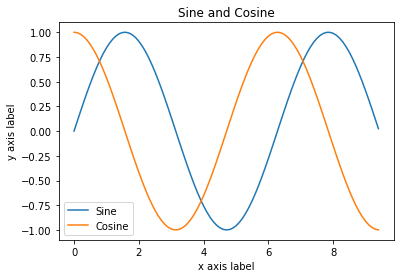

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# 计算正弦曲线上点的 x 和 y 坐标
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# 使用 matplotlib 绘制这些点
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

可以在[文档](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)中阅读更多关于 `plot` 的内容。

## 绘制多个图像
可以使用 `subplot` 函数来在一幅图中画不同的东西：

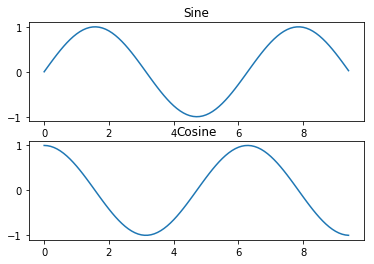

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# 计算正弦和余弦曲线上点的 x 和 y 坐标
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# 建立一个高度为 2，宽度为 1 的子图网格
# 并将第一个子图设为激活状态
plt.subplot(2, 1, 1)

# 绘制第一张图
plt.plot(x, y_sin)
plt.title('Sine')

# 将第二个子图设为激活状态，并绘制第二张图
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# 显示图像
plt.show()

关于 `subplot` 的更多细节，可以阅读[文档](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)。

## 图像

你可以使用 `imshow` 函数来显示图像，如下所示：

In [51]:
import numpy as np
from scipy.misc import imgio, imresize
import matplotlib.pyplot as plt

img = imgio.imread('assets/shibe.jpg')
img_tinted = img * [1, 0.95, 0.9]

# 显示原图
plt.subplot(1, 2, 1)
plt.imshow(img)

# 显示着色图
plt.subplot(1, 2, 2)

# imshow 的一个小问题是，它可能会给出奇怪的结果
# 如果显示的数据不是 uint8 类型，我们在显示图像之前显式地将其转换为 uint8
plt.imshow(np.uint8(img_tinted))
plt.show()

ImportError: cannot import name 'imgio' from 'scipy.misc' (D:\Environment\Anaconda3\lib\site-packages\scipy\misc\__init__.py)